In [1]:
#importamos la bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [2]:
#es necesario limpiar el archivo de tweets para que no se sesgue el cluster con las
#etiquetas de ironía y sarcasmo
infile = "ironicos_reduced.txt"
outfile = "ironicos_limpios.txt"

delete_list = ["#ironía", "#ironia", "#sarcasmo", "#Sarcasmo", "#Ironía", "#Ironia", "sarcasmo", "ironí"]
fin = open(infile)
fout = open(outfile, "w+")
for line in fin:
    for word in delete_list:
        line = line.replace(word, "")
    fout.write(line)
fin.close()
fout.close()
print "Se limpió el dataset"

Se limpió el dataset


In [3]:
#convertí el dataset en un arreglo para manejarlo fácilmete y agregué un conjunto de 
#palabras "irrelevantes" para el experimento
f = file("ironicos_limpios.txt")
fsw = file("spanish_stop_words.txt")
tweets = f.read().splitlines()
stop_w = fsw.read().splitlines()
print "Se convirtió en arreglo"

Se convirtió en arreglo


In [4]:
#vectorización de los tweets
vectorizer = TfidfVectorizer(stop_words = fsw)
X = vectorizer.fit_transform(tweets).todense()

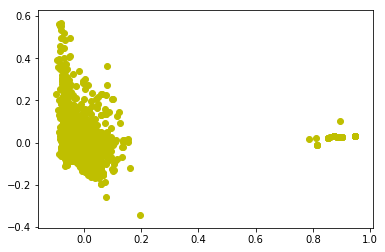

In [5]:
#Graficación de los tweets para observar qué podemos esperar tras la clasificación con cluster
pca = PCA(n_components = 4).fit(X)
data2D = pca.transform(X)
plt.scatter(data2D[:,0], data2D[:,1], c = 'y')
plt.show() 

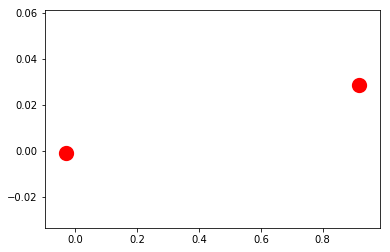

In [6]:
#clasificación de clusters, aquí decidí graficar los dos "principales" grupos
kmeans = KMeans(n_clusters = 2).fit(X)
centers2D = pca.transform(kmeans.cluster_centers_)

plt.scatter(centers2D[:,0], centers2D[:,1], marker='o', s=150, linewidths=3, c='r')
plt.show()

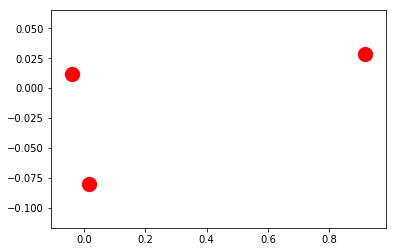

In [7]:
#graficación de los 3 principales grupos
kmeans = KMeans(n_clusters = 3).fit(X)
centers2D = pca.transform(kmeans.cluster_centers_)

plt.scatter(centers2D[:,0], centers2D[:,1], marker='o', s=150, linewidths=3, c='r')
plt.show()

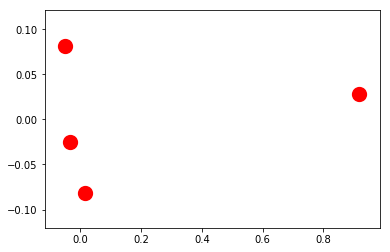

In [8]:
#graficación de los 4 "principales" grupos
kmeans = KMeans(n_clusters = 4).fit(X)
centers2D = pca.transform(kmeans.cluster_centers_)

plt.scatter(centers2D[:,0], centers2D[:,1], marker='o', s=150, linewidths=3, c='r')
plt.show()

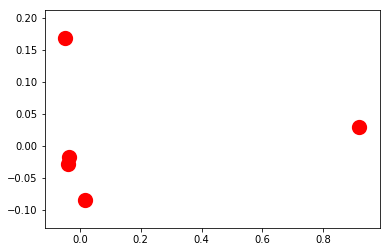

In [9]:
#graficación de los 5 principales grupos
kmeans = KMeans(n_clusters = 5).fit(X)
centers2D = pca.transform(kmeans.cluster_centers_)

plt.scatter(centers2D[:,0], centers2D[:,1], marker='o', s=150, linewidths=3, c='r')
plt.show()